In [1]:
!pip install prophet
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import prophet

In [3]:
from google.colab import files
uploaded = files.upload()

Saving unemployment.csv to unemployment.csv


In [19]:
df = pd.read_csv('unemployment.csv')
df

,Date,Value
0,01-01-2022,7.86
1,02-01-2022,7.82
2,03-01-2022,7.74
3,04-01-2022,7.72
4,05-01-2022,7.63
...,...,...
263,21-09-2022,6.79
264,22-09-2022,6.79
265,23-09-2022,6.84
266,24-09-2022,6.66


In [20]:

df.head()

,Date,Value
0,01-01-2022,7.86
1,02-01-2022,7.82
2,03-01-2022,7.74
3,04-01-2022,7.72
4,05-01-2022,7.63


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    Date   268 non-null    object 
 1    Value  268 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [6]:
df.describe()

,Value
count,268.000000
mean,7.477687
std,0.419418
min,6.480000
25%,7.200000
50%,7.510000
75%,7.780000
max,8.540000


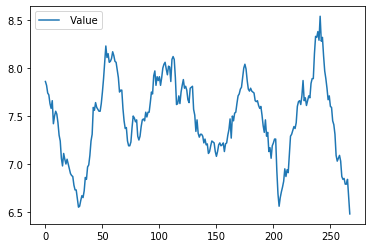

In [7]:
from matplotlib import pyplot
df.plot()
pyplot.show()

In [8]:
df.columns = ["ds","y"]
print(df)



              ds     y
0     01-01-2022  7.86
1     02-01-2022  7.82
2     03-01-2022  7.74
3     04-01-2022  7.72
4     05-01-2022  7.63
..           ...   ...
263   21-09-2022  6.79
264   22-09-2022  6.79
265   23-09-2022  6.84
266   24-09-2022  6.66
267   25-09-2022  6.48

[268 rows x 2 columns]


In [9]:
from prophet.forecaster import Prophet
prophet = Prophet()
prophet.fit(df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwh2oisdq/f1_ied8c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwh2oisdq/ugc805m5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62596', 'data', 'file=/tmp/tmpwh2oisdq/f1_ied8c.json', 'init=/tmp/tmpwh2oisdq/ugc805m5.json', 'output', 'file=/tmp/tmpwh2oisdq/prophet_modelmjwsqeeg/prophet_model-20221107064506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:45:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:45:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
..         ...
628 2023-12-05
629 2023-12-06
630 2023-12-07
631 2023-12-08
632 2023-12-09

[633 rows x 1 columns]


In [11]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
433,2023-05-24,7.292340,6.826982,7.847101
434,2023-05-25,7.312342,6.803406,7.842972
435,2023-05-26,7.318653,6.854659,7.865738
436,2023-05-27,7.303824,6.765452,7.844751
437,2023-05-28,7.283464,6.762454,7.783197
...,...,...,...,...
628,2023-12-05,7.191814,6.652429,7.735373
629,2023-12-06,7.172685,6.629628,7.732593
630,2023-12-07,7.192686,6.626501,7.731297
631,2023-12-08,7.198998,6.640566,7.734994


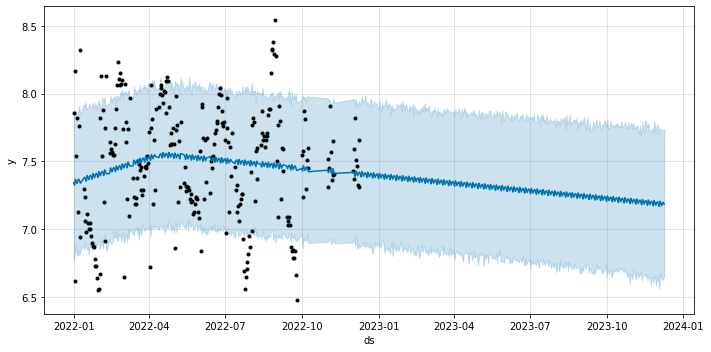

In [17]:
from prophet.plot import plot
prophet.plot(forecast, figsize=(10,5 ))
pyplot.show()
